# California Housing Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dt = pd.read_csv("housing.csv")

In [3]:
dt.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
dt.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
dt.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
dc = dt.copy()

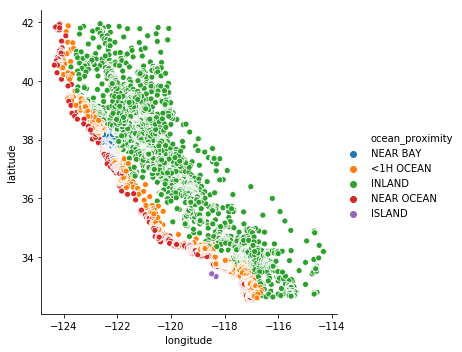

In [8]:
sns.relplot(x='longitude',y='latitude',data=dt,kind='scatter', hue='ocean_proximity')

In [9]:
dt.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

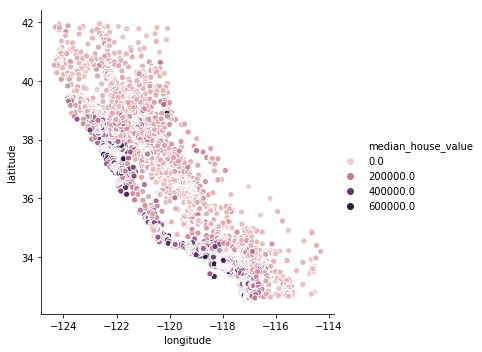

In [10]:
sns.relplot(x='longitude',y='latitude',data=dt,kind='scatter', hue='median_house_value')

In [11]:
dt.median_house_value.nunique()

3842

<Figure size 720x504 with 0 Axes>

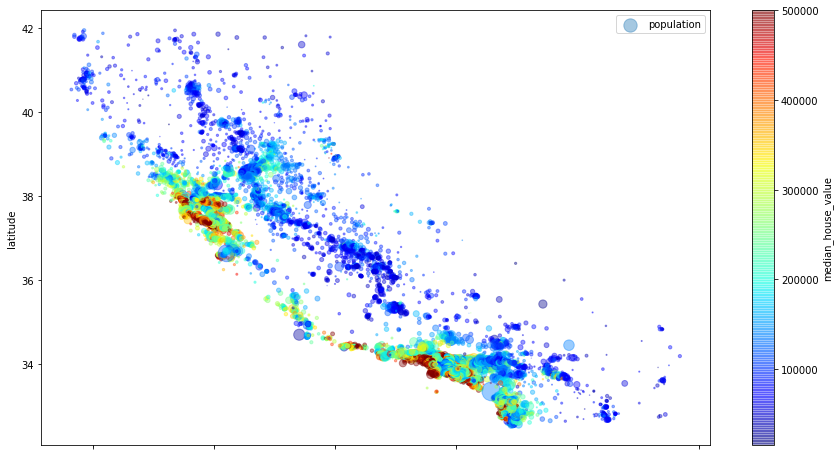

In [12]:
plt.figure(figsize=(10,7))
dt.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=dt["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

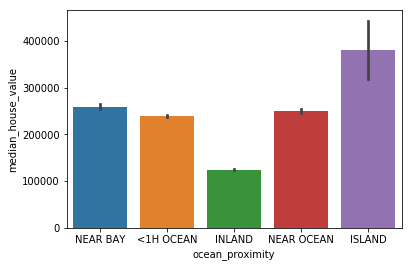

In [13]:
sns.barplot(x='ocean_proximity', y='median_house_value', data=dt)

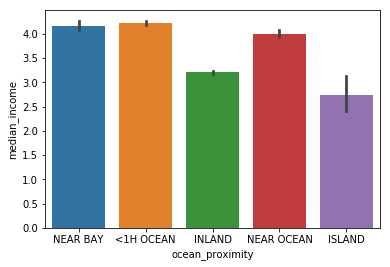

In [14]:
sns.barplot(x='ocean_proximity', y='median_income', data=dt)

In [15]:
dt['rooms/households'] = dt['total_rooms']/dt['households']

In [16]:
dt['bedrooms/households'] = dt['total_bedrooms']/dt['households']

In [17]:
d_op = dt.groupby('ocean_proximity')

In [18]:
d_op.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms/households,bedrooms/households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN,7.502924,1.134503
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN,5.214794,1.011380
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN,5.503169,0.992395
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,6.395349,1.067979
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN,4.231795,1.057436


In [19]:
d_op.median_income.mean() # x10,000$

ocean_proximity
<1H OCEAN     4.230682
INLAND        3.208996
ISLAND        2.744420
NEAR BAY      4.172885
NEAR OCEAN    4.005785
Name: median_income, dtype: float64

In [20]:
d_op['rooms/households'].mean()

ocean_proximity
<1H OCEAN     5.152576
INLAND        5.977265
ISLAND        5.656577
NEAR BAY      5.221705
NEAR OCEAN    5.206008
Name: rooms/households, dtype: float64

In [21]:
d_op['bedrooms/households'].mean()

ocean_proximity
<1H OCEAN     1.049735
INLAND        1.187054
ISLAND        1.522004
NEAR BAY      1.053122
NEAR OCEAN    1.074458
Name: bedrooms/households, dtype: float64

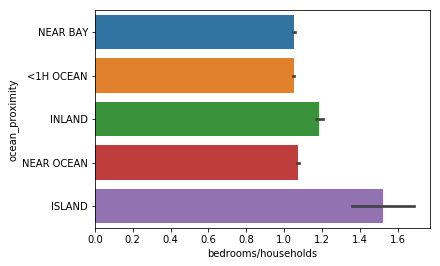

In [22]:
sns.barplot(x="bedrooms/households", y="ocean_proximity", data=dt)

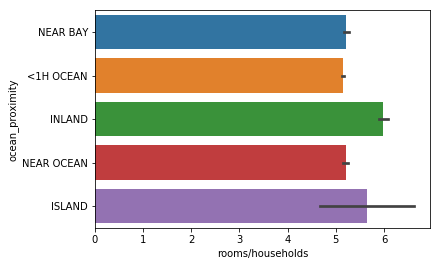

In [23]:
sns.barplot(x="rooms/households", y="ocean_proximity", data=dt)

In [24]:
dt.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms/households,bedrooms/households
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,1.097062
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.476104
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.333333
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,1.006029
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,1.048889
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,1.099631
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E52DF07F0>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

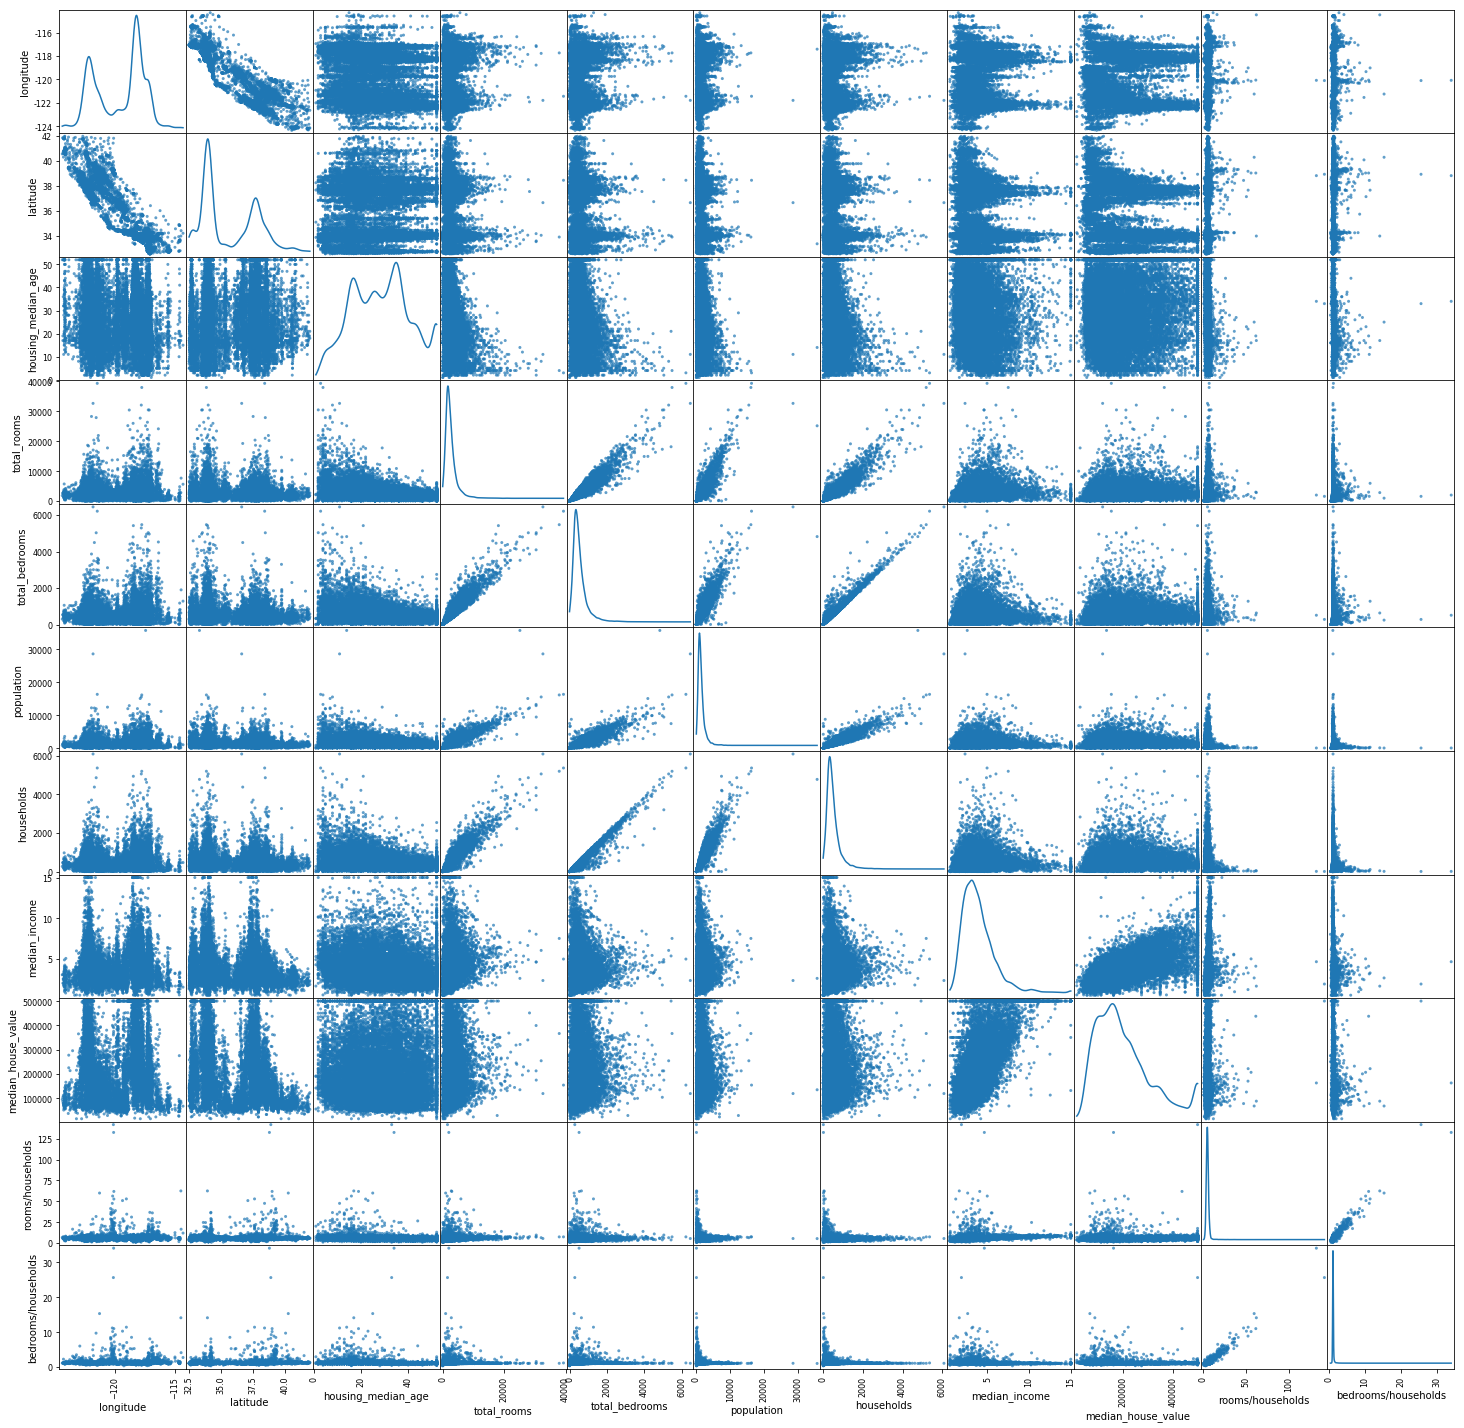

In [25]:
fig = plt.figure()
pd.plotting.scatter_matrix(dt, alpha=0.7, figsize=(25,25), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E590466D8>,
      dtype=object)

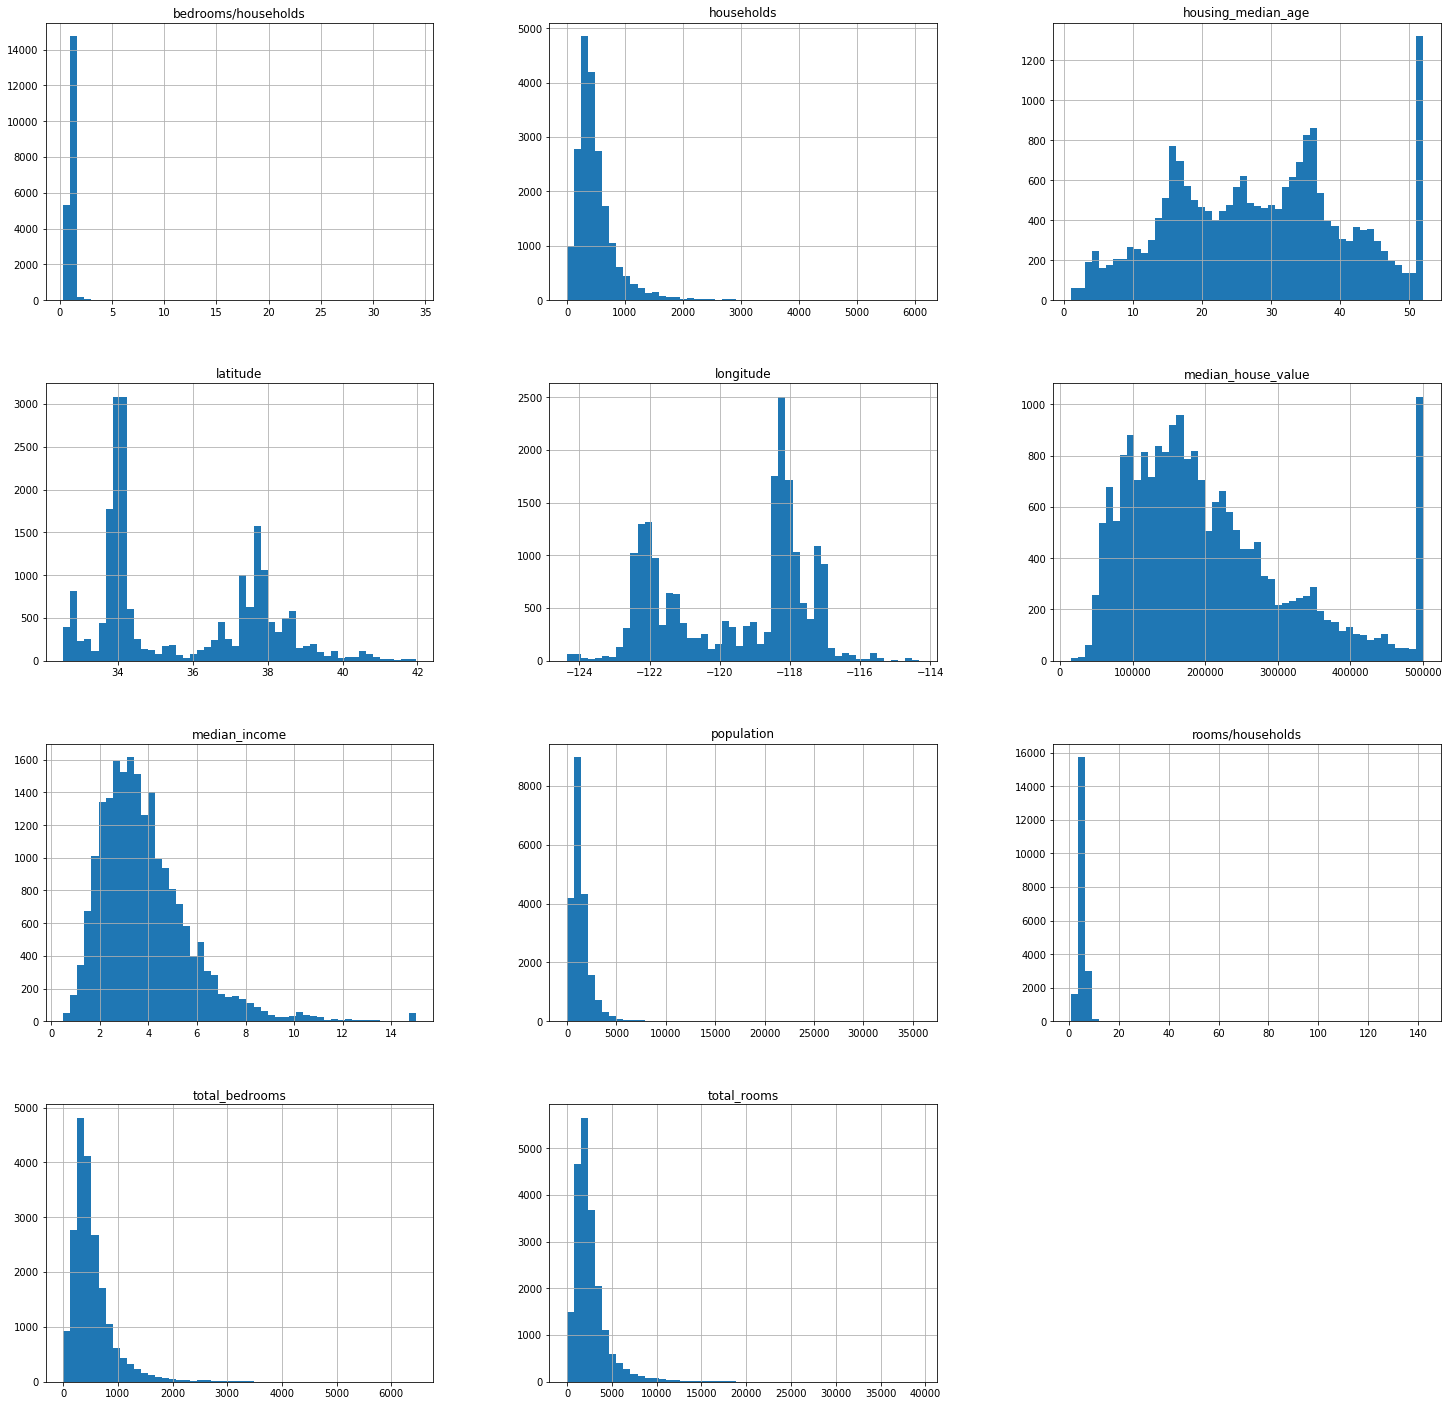

In [26]:
dt.hist(figsize = (25,25), bins=50)

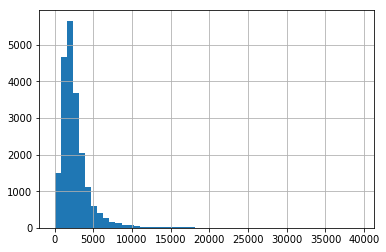

In [27]:
dt['total_rooms'].hist(bins=50)

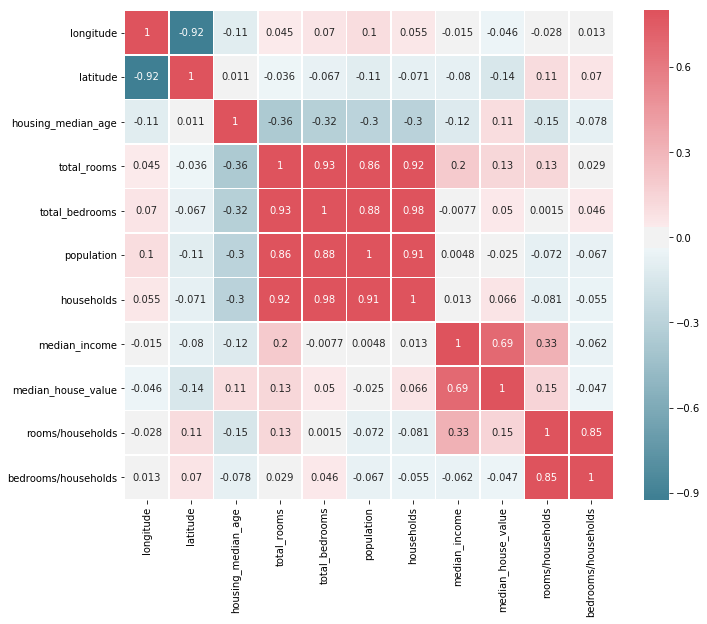

In [28]:
d_corr = dt.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(d_corr, cmap=cmap, vmax=0.8, center=0, annot=True, square=True, linewidths=.5)

# Get the outliers

In [29]:
from scipy import stats
z = np.abs(stats.zscore(dt["total_rooms"]))
dt['z_score']=z
# dt = dt[(z < 3).all(axis=1)]

In [30]:
dt = dt[dt['z_score']<3]

In [31]:
len(dt)

20267

In [38]:
g = dt.groupby('ocean_proximity')
dt['total_bedrooms'] = g['total_bedrooms'].apply(lambda x: x.fillna(x.median()))

C:\Users\Ananay Srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
dt = pd.concat([dt, pd.get_dummies(dt['ocean_proximity'], prefix='ocean_prox', drop_first=True)], axis=1)

In [41]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20268 entries, 0 to total_rooms
Data columns (total 17 columns):
longitude                20267 non-null float64
latitude                 20267 non-null float64
housing_median_age       20267 non-null float64
total_rooms              20267 non-null float64
total_bedrooms           20267 non-null float64
population               20267 non-null float64
households               20267 non-null float64
median_income            20267 non-null float64
median_house_value       20267 non-null float64
ocean_proximity          20267 non-null object
rooms/households         20267 non-null float64
bedrooms/households      20062 non-null float64
z_score                  20267 non-null float64
ocean_prox_INLAND        20268 non-null uint8
ocean_prox_ISLAND        20268 non-null uint8
ocean_prox_NEAR BAY      20268 non-null uint8
ocean_prox_NEAR OCEAN    20268 non-null uint8
dtypes: float64(12), object(1), uint8(4)
memory usage: 2.2+ MB


In [43]:
dt.drop(['ocean_proximity', 'total_rooms', 'total_bedrooms', 'z_score'], axis=1, inplace=True)